In [41]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_score
import seaborn as sns
from sklearn.manifold import TSNE
import umap

In [42]:
folder_path = r"C:\Users\tere1\OneDrive\Escritorio\TFM\datos_img"
# Cargar las características normalizadas por Z-score
df_combined_all_z = pd.read_csv(os.path.join(folder_path, "features_combined_all_zscore.csv"))
# Cargar las características normalizadas por Min-Max
df_combined_all_mm = pd.read_csv(os.path.join(folder_path, "features_combined_all_minmax.csv"))

#se quitan las columnas 'filename' y 'label'
df_combined_all_mm_cl= df_combined_all_mm.drop(columns=['label', 'filename'])
df_combined_all_z_cl= df_combined_all_z.drop(columns=['label', 'filename'])

In [43]:
bandwidth_estimate = estimate_bandwidth(df_combined_all_z_cl.values, quantile=0.2)
print("Estimated bandwidth:", bandwidth_estimate)

Estimated bandwidth: 3.226545456761852


In [44]:
bandwidth_values = [ 3.22, 3, 3.5,4, 4.5, 4.8, 5, 5.5, 5.2]

for bw in bandwidth_values:
    ms = MeanShift(bandwidth=bw, bin_seeding=True)
    ms.fit(df_combined_all_z_cl.values)
    labels = ms.labels_
    n_clusters = len(np.unique(labels))
    
    if n_clusters > 1:  # Solo tiene sentido calcular Silhouette si hay más de 1 clúster
        score = silhouette_score(df_combined_all_z_cl.values, labels)
        print(f"Bandwidth: {bw:.2f} | Clusters: {n_clusters} | Silhouette Score: {score:.3f}")
    else:
        print(f"Bandwidth: {bw:.2f} | Clusters: {n_clusters} | Silhouette Score: N/A (solo 1 clúster)")

Bandwidth: 3.22 | Clusters: 6 | Silhouette Score: 0.315
Bandwidth: 3.00 | Clusters: 6 | Silhouette Score: 0.267
Bandwidth: 3.50 | Clusters: 4 | Silhouette Score: 0.329
Bandwidth: 4.00 | Clusters: 4 | Silhouette Score: 0.334
Bandwidth: 4.50 | Clusters: 4 | Silhouette Score: 0.384
Bandwidth: 4.80 | Clusters: 3 | Silhouette Score: 0.447
Bandwidth: 5.00 | Clusters: 2 | Silhouette Score: 0.530
Bandwidth: 5.50 | Clusters: 2 | Silhouette Score: 0.530
Bandwidth: 5.20 | Clusters: 2 | Silhouette Score: 0.530


In [45]:
bandwidth = 5 #bandwidth_estimate
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(df_combined_all_z_cl.values)
labels = ms.labels_
n_clusters = len(np.unique(labels))
print(f"Clusters: {n_clusters}")

Clusters: 2


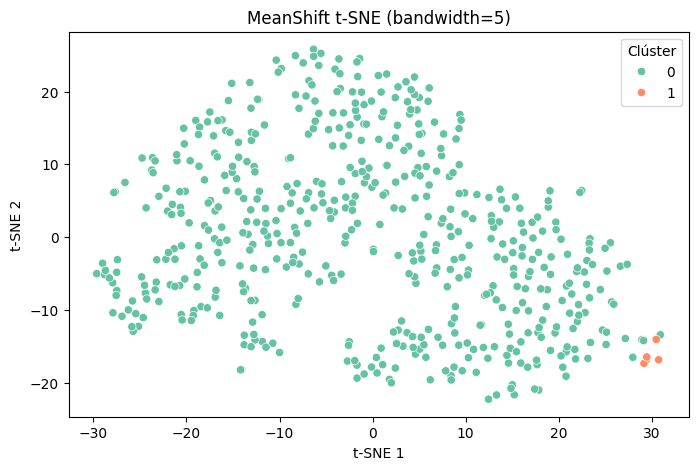

In [46]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(df_combined_all_z_cl.values)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=labels, palette='Set2')
plt.title(f'MeanShift t-SNE (bandwidth={bandwidth})')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend(title='Clúster')
plt.show()

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


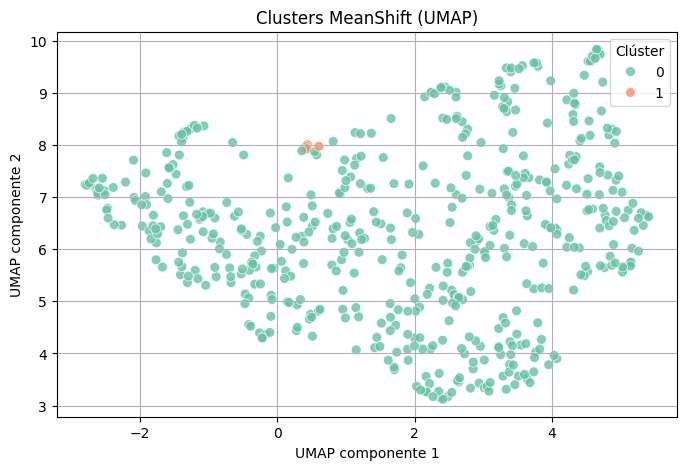

In [47]:
reducer = umap.UMAP(n_neighbors=15, n_components=2, random_state=42)
X_umap_z = reducer.fit_transform(df_combined_all_z_cl)

plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=X_umap_z[:, 0],
    y=X_umap_z[:, 1],
    hue=labels,        
    palette='Set2',
    s=50,
    alpha=0.8
)
plt.title('Clusters MeanShift (UMAP)')
plt.xlabel('UMAP componente 1')
plt.ylabel('UMAP componente 2')
plt.legend(title='Clúster')
plt.grid(True)
plt.show()

In [48]:
score_z = silhouette_score(df_combined_all_z_cl, labels)
print(f"Silhouette Score: {score_z:.3f}")

Silhouette Score: 0.530


In [49]:
# Guardar resultados en DataFrame
df_resultado = pd.DataFrame({

    'label': df_combined_all_z['label'],
    'cluster': labels
})

# Tabla de contingencia: comparación entre etiquetas originales y clústeres
tabla_contingencia = pd.crosstab(df_resultado['label'], df_resultado['cluster'])
print("Tabla de contingencia entre etiquetas originales y clústeres:")
print(tabla_contingencia)


Tabla de contingencia entre etiquetas originales y clústeres:
cluster    0  1
label          
higher   268  0
smaller  264  5


In [50]:
#no sale equilibrado, todo en un cluster da igual cuantos clusteres haya

In [51]:
bandwidth_estimate_mm = estimate_bandwidth(df_combined_all_mm_cl.values, quantile=0.2)
print("Estimated bandwidth:", bandwidth_estimate_mm)

Estimated bandwidth: 0.5213496760815395


In [52]:
bandwidth_values = [0.58, 0.53, 0.55, 0.521, 0.532]

for bw in bandwidth_values:
    ms_mm = MeanShift(bandwidth=bw, bin_seeding=True)
    ms_mm.fit(df_combined_all_mm_cl.values)
    labels_mm = ms_mm.labels_
    n_clusters_mm = len(np.unique(labels_mm))
    
    if n_clusters_mm > 1:
        score = silhouette_score(df_combined_all_mm_cl.values, labels_mm)
        print(f"Bandwidth: {bw:.2f} | Clusters: {n_clusters_mm} | Silhouette Score: {score:.3f}")
    else:
        print(f"Bandwidth: {bw:.2f} | Clusters: {n_clusters_mm} | Silhouette Score: N/A (solo 1 clúster)")

Bandwidth: 0.58 | Clusters: 3 | Silhouette Score: 0.337
Bandwidth: 0.53 | Clusters: 2 | Silhouette Score: 0.378
Bandwidth: 0.55 | Clusters: 3 | Silhouette Score: 0.337
Bandwidth: 0.52 | Clusters: 4 | Silhouette Score: 0.317
Bandwidth: 0.53 | Clusters: 2 | Silhouette Score: 0.378


In [53]:
bandwidth = 0.53
meanshift_mm = MeanShift(bandwidth=bandwidth, bin_seeding=True)
meanshift_mm.fit(df_combined_all_mm_cl.values)
labels_mm = meanshift_mm.labels_  

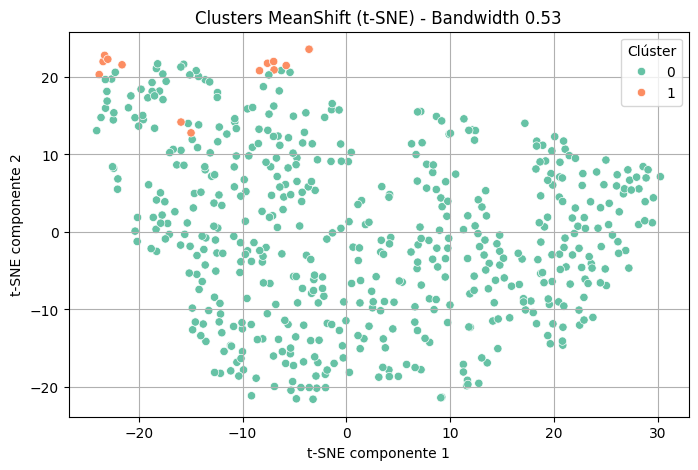

In [54]:

tsne_mm = TSNE(n_components=2, random_state=42)
X_tsne_mm = tsne_mm.fit_transform(df_combined_all_mm_cl.values)

# Gráfico
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_tsne_mm[:, 0], y=X_tsne_mm[:, 1], hue=labels_mm, palette='Set2')
plt.title(f'Clusters MeanShift (t-SNE) - Bandwidth {bandwidth}')
plt.xlabel('t-SNE componente 1')
plt.ylabel('t-SNE componente 2')
plt.legend(title='Clúster')
plt.grid(True)
plt.show()

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


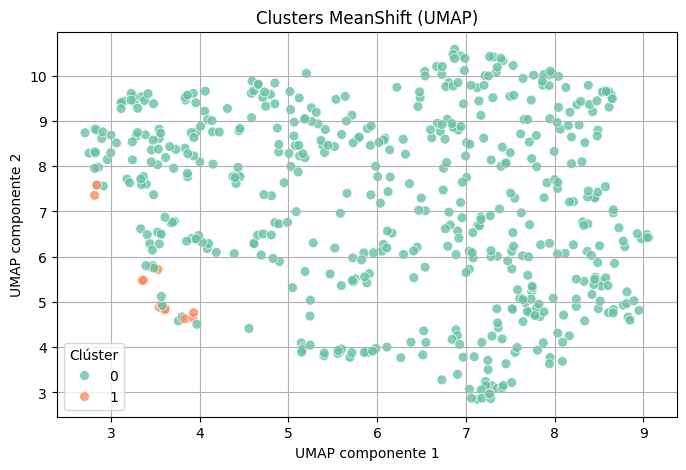

In [55]:
reducer = umap.UMAP(n_neighbors=15, n_components=2, random_state=42)
X_umap_mm = reducer.fit_transform(df_combined_all_mm_cl)


plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=X_umap_mm[:, 0],
    y=X_umap_mm[:, 1],
    hue=labels_mm,        
    palette='Set2',
    s=50,
    alpha=0.8
)
plt.title('Clusters MeanShift (UMAP)')
plt.xlabel('UMAP componente 1')
plt.ylabel('UMAP componente 2')
plt.legend(title='Clúster')
plt.grid(True)
plt.show()

In [56]:
score_mm = silhouette_score(df_combined_all_mm_cl, labels_mm)
print(f"Silhouette Score: {score_mm:.3f}")

Silhouette Score: 0.378


In [57]:
df_resultado = pd.DataFrame({
    'label': df_combined_all_mm['label'],
    'cluster': labels_mm
})

tabla_contingencia = pd.crosstab(df_resultado['label'], df_resultado['cluster'])
print(tabla_contingencia)


cluster    0   1
label           
higher   266   2
smaller  257  12


se hace reduccion de la dimensionalidad con umap

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\tere1\AppData\Local\Temp\ipykernel_13284\1199781114.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_umap_z[:, 0], X_umap_z[:, 1], cmap='Spectral', edgecolor='k', alpha=0.7)


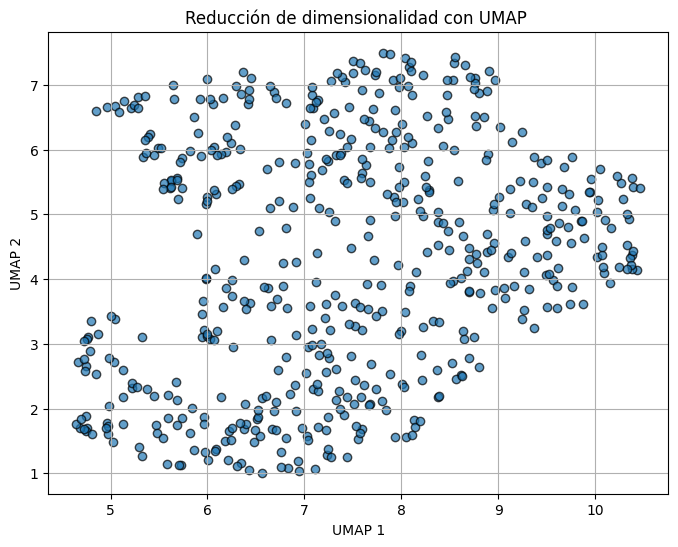

In [97]:
# Reduccion de la dimensionalidad con UMAP
umap_model_z = umap.UMAP(n_neighbors=35,n_components=2, random_state=42) 
X_umap_z = umap_model_z.fit_transform(df_combined_all_z_cl)

# Visualizar los resultados de UMAP
plt.figure(figsize=(8, 6))
plt.scatter(X_umap_z[:, 0], X_umap_z[:, 1], cmap='Spectral', edgecolor='k', alpha=0.7)
plt.title('Reducción de dimensionalidad con UMAP ')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.grid(True)
plt.show()

In [98]:
# Estimación del bandwidth
bandwidth_umap = estimate_bandwidth(X_umap_z, quantile=0.2, n_samples=500)

# Ajuste de MeanShift
ms_umap = MeanShift(bandwidth=bandwidth_umap, bin_seeding=True)
ms_umap.fit(X_umap_z)
labels_umap = ms_umap.labels_  
n_clusters = len(np.unique(labels_umap))

# Contar los elementos en cada clúster
unique, counts = np.unique(labels_umap, return_counts=True)

# Mostrar resultados solo si hay más de un clúster y los clústeres son adecuados
if n_clusters > 1 and all(count > 1 for count in counts):
    score = silhouette_score(X_umap_z, labels_umap)
    print(f"Auto Bandwidth: {bandwidth_umap:.3f} | Clusters: {n_clusters} | Silhouette Score: {score:.3f}")
else:
    print(f"Auto Bandwidth: {bandwidth_umap:.3f} | Clusters: {n_clusters} | Silhouette Score: N/A (clústeres demasiado pequeños)")

Auto Bandwidth: 1.604 | Clusters: 3 | Silhouette Score: 0.473


In [99]:
bandwidth_values = [2.22, 2, 2.5,2.52, 2.6, 1.63]

for bw in bandwidth_values:
    ms_z = MeanShift(bandwidth=bw, bin_seeding=True)
    ms_z.fit(X_umap_z)
    labels_z = ms_z.labels_
    n_clusters_z = len(np.unique(labels_z))
    
    if n_clusters_z> 1:
        score = silhouette_score(X_umap_z, labels_z)
        print(f"Bandwidth: {bw:.2f} | Clusters: {n_clusters_mm} | Silhouette Score: {score:.3f}")
    else:
        print(f"Bandwidth: {bw:.2f} | Clusters: {n_clusters_mm} | Silhouette Score: N/A (solo 1 clúster)")

Bandwidth: 2.22 | Clusters: 2 | Silhouette Score: 0.463
Bandwidth: 2.00 | Clusters: 2 | Silhouette Score: 0.455
Bandwidth: 2.50 | Clusters: 2 | Silhouette Score: 0.463
Bandwidth: 2.52 | Clusters: 2 | Silhouette Score: 0.463
Bandwidth: 2.60 | Clusters: 2 | Silhouette Score: 0.463
Bandwidth: 1.63 | Clusters: 2 | Silhouette Score: 0.472


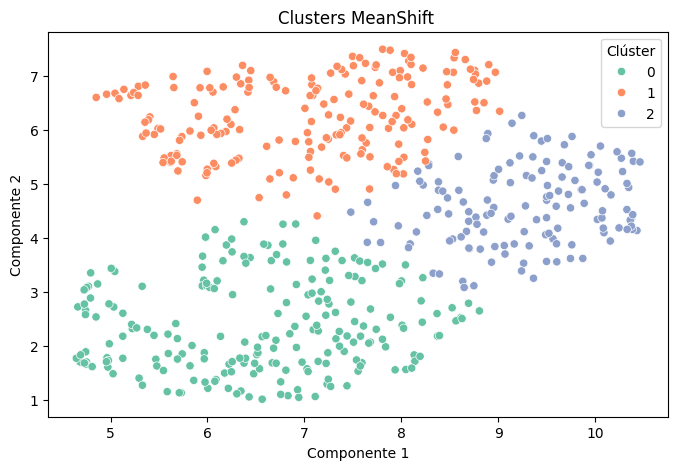

     label  cluster
0  smaller        1
1  smaller        1
2  smaller        0
3  smaller        0
4  smaller        0


In [104]:
bandwidth_def = 1.604
meanshift_z = MeanShift(bandwidth=bandwidth_def, bin_seeding=True)
meanshift_z.fit(X_umap_z) 
labels_umap = meanshift_z.labels_  

# Visualización con Seaborn
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_umap_z[:, 0], y=X_umap_z[:, 1], hue=labels_umap, palette='Set2')
plt.title('Clusters MeanShift ')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.legend(title='Clúster')
plt.show()

# Guardar resultados en DataFrame
df_resultado = pd.DataFrame({

    'label': df_combined_all_z['label'],
    'cluster': labels_umap  # Usamos las etiquetas generadas en la última ejecución
})

# Mostrar primeras filas
print(df_resultado.head())

In [105]:
# Crear tabla de contingencia
tabla_contingencia = pd.crosstab(df_resultado['label'], df_resultado['cluster'])

# Mostrar la tabla
print(tabla_contingencia)


cluster    0    1    2
label                 
higher    12  137  119
smaller  200   51   18


In [106]:
#df_resultado.to_csv(os.path.join(folder_path, 'resultado_meanshift_umap_mm_all.csv'), index=False)


tb se pueden dos  clusteres

min-max

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\tere1\AppData\Local\Temp\ipykernel_13284\1612140228.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_umap_mm[:, 0], X_umap_mm[:, 1], cmap='Spectral', edgecolor='k', alpha=0.7)


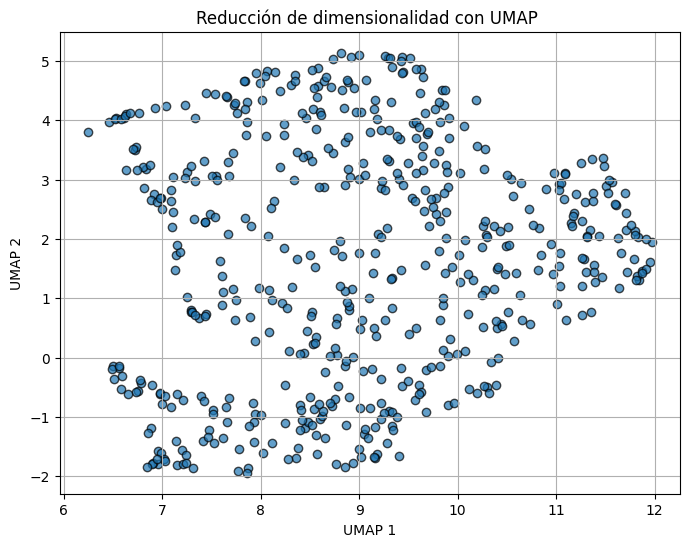

In [107]:
# Reduccion de la dimensionalidad con UMAP
umap_model_mm = umap.UMAP(n_neighbors=30,n_components=2, random_state=42) 
X_umap_mm = umap_model_mm.fit_transform(df_combined_all_mm_cl)

# Visualizar los resultados de UMAP
plt.figure(figsize=(8, 6))
plt.scatter(X_umap_mm[:, 0], X_umap_mm[:, 1], cmap='Spectral', edgecolor='k', alpha=0.7)
plt.title('Reducción de dimensionalidad con UMAP ')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.grid(True)
plt.show()

In [108]:
# Estimación del bandwidth
bandwidth_umap = estimate_bandwidth(X_umap_mm, quantile=0.2, n_samples=500)

# Ajuste de MeanShift
ms_umap = MeanShift(bandwidth=bandwidth_umap, bin_seeding=True)
ms_umap.fit(X_umap_mm)
labels_umap = ms_umap.labels_  
n_clusters = len(np.unique(labels_umap))

# Contar los elementos en cada clúster
unique, counts = np.unique(labels_umap, return_counts=True)

# Mostrar resultados solo si hay más de un clúster y los clústeres son adecuados
if n_clusters > 1 and all(count > 1 for count in counts):
    score = silhouette_score(X_umap_mm, labels_umap)
    print(f"Auto Bandwidth: {bandwidth_umap:.3f} | Clusters: {n_clusters} | Silhouette Score: {score:.3f}")
else:
    print(f"Auto Bandwidth: {bandwidth_umap:.3f} | Clusters: {n_clusters} | Silhouette Score: N/A (clústeres demasiado pequeños)")

Auto Bandwidth: 1.655 | Clusters: 3 | Silhouette Score: 0.467


In [109]:
bandwidth_values = [2.22, 2, 2.5,2.52, 2.6, 2.391, 2.21, 2.19, 2.56, 2.58]

for bw in bandwidth_values:
    ms_mm = MeanShift(bandwidth=bw, bin_seeding=True)
    ms_mm.fit(X_umap_mm)
    labels_mm = ms_mm.labels_
    n_clusters_mm = len(np.unique(labels_mm))
    
    if n_clusters_mm > 1:
        score = silhouette_score(X_umap_z, labels_mm)
        print(f"Bandwidth: {bw:.2f} | Clusters: {n_clusters_mm} | Silhouette Score: {score:.3f}")
    else:
        print(f"Bandwidth: {bw:.2f} | Clusters: {n_clusters_mm} | Silhouette Score: N/A (solo 1 clúster)")

Bandwidth: 2.22 | Clusters: 2 | Silhouette Score: 0.447
Bandwidth: 2.00 | Clusters: 3 | Silhouette Score: 0.450
Bandwidth: 2.50 | Clusters: 2 | Silhouette Score: 0.446
Bandwidth: 2.52 | Clusters: 2 | Silhouette Score: 0.446
Bandwidth: 2.60 | Clusters: 1 | Silhouette Score: N/A (solo 1 clúster)
Bandwidth: 2.39 | Clusters: 2 | Silhouette Score: 0.438
Bandwidth: 2.21 | Clusters: 2 | Silhouette Score: 0.447
Bandwidth: 2.19 | Clusters: 2 | Silhouette Score: 0.446
Bandwidth: 2.56 | Clusters: 2 | Silhouette Score: 0.448
Bandwidth: 2.58 | Clusters: 2 | Silhouette Score: 0.447


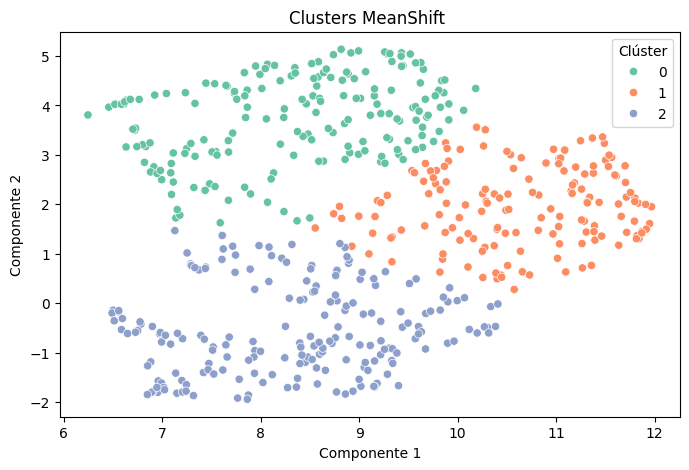

     label  cluster
0  smaller        0
1  smaller        0
2  smaller        2
3  smaller        2
4  smaller        2


In [110]:
bandwidth_def = 2
meanshift_mm = MeanShift(bandwidth=bandwidth_def, bin_seeding=True)
meanshift_mm.fit(X_umap_mm) 
labels_umap = meanshift_mm.labels_  

# Visualización con Seaborn
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_umap_mm[:, 0], y=X_umap_mm[:, 1], hue=labels_umap, palette='Set2')
plt.title('Clusters MeanShift ')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.legend(title='Clúster')
plt.show()

# Guardar resultados en DataFrame
df_resultado = pd.DataFrame({

    'label': df_combined_all_mm['label'],
    'cluster': labels_umap  # Usamos las etiquetas generadas en la última ejecución
})

# Mostrar primeras filas
print(df_resultado.head())

In [111]:
# Crear tabla de contingencia
tabla_contingencia = pd.crosstab(df_resultado['label'], df_resultado['cluster'])

# Mostrar la tabla
print(tabla_contingencia)

cluster    0    1    2
label                 
higher   135  126    7
smaller   52   28  189
